# Assingment 1

Implement the following numerical methods to find the solution of the integral $\int_{0}^{\pi/4} e^{2x}sin(2x) \, dx$:

- Left Riemann sum
- Right Riemann sum
- Trapezoid rule
- Simpson rule

The real value is $\frac{3}{13} e^{3\pi/4} + \frac{2}{13}$

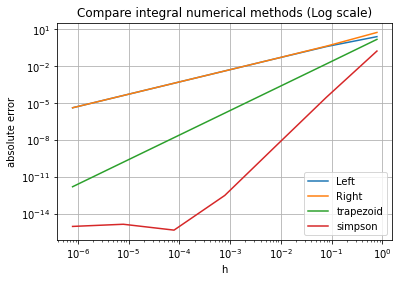

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def leftParallelogram(func, input, h):
    xLeft = input[:-1]
    output = func(xLeft)
    return np.sum(output * h)

def rightParallelogram(output, input, h):
    xRight = input[1:]
    output = func(xRight)
    return np.sum(output * h)

def trapezoid(output, input, h):
    end = len(input)
    return h/2 * (output(input[0]) + 2*np.sum(output(input[1:end-1])) \
        + output(input[end-1]))

def simpson(output, input, h):
    n = len(input)
    return (h/3) * (output(input[0]) + 2*np.sum(output(input[:n-2:2])) \
        + 4*np.sum(output(input[1:n-1:2])) + output(input[n-1]))

N = np.array([10**i for i in range(0,7)])
N = N + 1 # to create N intervals
a, b = 0, np.pi / 4
h = (b-a)/(N-1)
input = lambda x: np.array(np.linspace(a, b, x)) 
func = lambda x: np.exp(3 * x) * np.sin(2 * x)
realValue = 3/13 * np.exp(3*np.pi/4) + 2/13

left = [abs(realValue - leftParallelogram(func, input(i), h[j])) for i,j in zip(N,range(0,len(h)))]
right = [abs(realValue - rightParallelogram(func, input(i), h[j])) for i,j in zip(N,range(0,len(h)))]
trap = [abs(realValue - trapezoid(func, input(i), h[j])) for i,j in zip(N,range(0,len(h)))]
sims = [abs(realValue - simpson(func, input(i), h[j])) for i,j in zip(N,range(0,len(h)))]

plt.figure()
plt.loglog(h, left, label = 'Left')
plt.loglog(h, right, label = 'Right')
plt.loglog(h, trap, label = 'trapezoid')
plt.loglog(h, sims, label = 'simpson')
plt.title("Compare integral numerical methods (Log scale)")
plt.xlabel("h")
plt.ylabel("absolute error")
plt.grid()
plt.legend()

# Conclusions

We can observe that as we increase the order of the polynomial interpolation, the smaller the absolute error is.

# Assignment 2

We have the following system of first order differential equations:

$x_o' = 1.1x_o - 0.4x_0x_1$

$x_1' = 0.4x_ox_1 - 0.1x_1$

- Solve the system with Euler's method, $x_0(0) = 20$, $x_1(0) = 1$, $t_{max} = 200$ and small $dt=0.1$
- Change $dt=0.01$. What do you observe?


Text(0, 0.5, 'Foxes state')

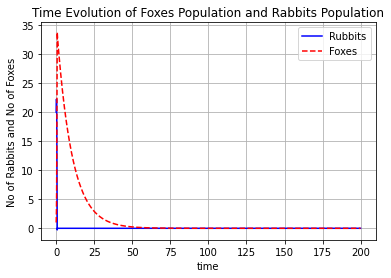

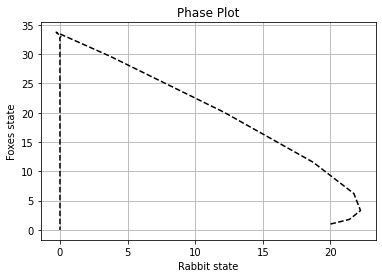

In [40]:
import matplotlib.pyplot as plt

def euler(F,x0,t0,tmax,dt):
    t = np.arange(t0,tmax,dt)
    x = np.zeros((len(t), len(x0)))
    x[0,:] = x0
    for n in range(len(t) - 1):
        x[n+1,:] = x[n,:] + dt*F(t[n], x[n,:])
    return t,x

F = lambda t,x: np.array([1.1*x[0] - 0.4*x[0]*x[1], 0.4*x[0] * x[1] - 0.1*x[1]])
x0 = [20, 1]
t0, tmax, dt = 0, 200, 0.1
t, x = euler(F,x0,t0,tmax,dt)

plt.figure()
plt.plot(t,x[:,0],'b-', label='Rubbits')
plt.plot(t,x[:,1],'r--', label='Foxes')
plt.grid()
plt.title('Time Evolution of Foxes Population and Rabbits Population')
plt.legend()
plt.xlabel('time')
plt.ylabel('No of Rabbits and No of Foxes')

plt.figure()
plt.plot(x[:,0], x[:,1], 'k--')
plt.grid()
plt.title('Phase Plot')
plt.xlabel('Rabbit state')
plt.ylabel('Foxes state')


# Conclusions
